RFM Feature

In [94]:
import pandas as pd

# Reload the clean, saved data
df = pd.read_csv('marketing_campaign_final.csv')

# Parse the date column again
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], errors='coerce')

In [95]:
# Set a 'today' reference date (as the the start of Q2 2025)
reference_date = pd.to_datetime('2025-03-01')

# Tenure in days
df['Tenure_Days'] = (reference_date - df['Dt_Customer']).dt.days

df[['ID', 'Dt_Customer', 'Tenure_Days']].head()

,ID,Dt_Customer,Tenure_Days
0,5524,2012-09-04,4561
1,2174,2014-03-08,4011
2,4141,2013-08-21,4210
3,6182,2014-02-10,4037
4,5324,2014-01-19,4059


In [96]:
#Recency in days
df[['ID', 'Recency']].head()

,ID,Recency
0,5524,58
1,2174,38
2,4141,26
3,6182,26
4,5324,94


In [97]:
# Calculate total purchases by adding up all touchpoint purchase columns - “Frequency was calculated as the total number of purchases made across all channels (web, catalog, and store).” - Frequency is usually the number of purchases.


purchase_columns = [
    'NumWebPurchases',
    'NumCatalogPurchases',
    'NumStorePurchases'
]

df['Frequency'] = df[purchase_columns].sum(axis=1)
df[['ID', 'Frequency']].head()

,ID,Frequency
0,5524,22
1,2174,4
2,4141,20
3,6182,6
4,5324,14


In [98]:
#“Monetary value was calculated as the total amount spent on all product categories.” - Monetary is the total money spent.

monetary_columns = [
    'MntWines', 'MntFruits', 'MntMeatProducts',
    'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'
]

df['Monetary'] = df[monetary_columns].sum(axis=1)
df[['ID', 'Monetary']].head()

,ID,Monetary
0,5524,1617
1,2174,27
2,4141,776
3,6182,53
4,5324,422


In [99]:
df[['Recency', 'Frequency', 'Monetary']].describe()

,Recency,Frequency,Monetary
count,2237.000000,2237.000000,2237.000000
mean,49.104604,12.544032,605.743406
std,28.956073,7.205919,601.840466
min,0.000000,0.000000,5.000000
25%,24.000000,6.000000,69.000000
50%,49.000000,12.000000,396.000000
75%,74.000000,18.000000,1045.000000
max,99.000000,32.000000,2525.000000


Assign RFM scores

In [100]:
#Recency
df['R_Score'] = pd.qcut(df['Recency'], 5, labels=[5, 4, 3, 2, 1]).astype(int)

In [101]:
#Frequency
df['F_Score'] = pd.qcut(df['Frequency'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5]).astype(int)

In [102]:
#Monetary
df['M_Score'] = pd.qcut(df['Monetary'], 5, labels=[1, 2, 3, 4, 5]).astype(int)

In [103]:
#Cmobine RFM scores
df['RFM_Segment'] = df['R_Score'].astype(str) + df['F_Score'].astype(str) + df['M_Score'].astype(str)
df[['ID', 'RFM_Segment']].head(10)

,ID,RFM_Segment
0,5524,355
1,2174,411
2,4141,444
3,6182,421
4,5324,133
5,7446,544
6,965,443
7,6177,422
8,4855,511
9,5899,211


In [104]:
#Calculate RFM 'score sum'
df['RFM_Score'] = df['R_Score'] + df['F_Score'] + df['M_Score']
df[['ID', 'RFM_Segment', 'RFM_Score']].head(10)

,ID,RFM_Segment,RFM_Score
0,5524,355,13
1,2174,411,6
2,4141,444,12
3,6182,421,7
4,5324,133,7
5,7446,544,13
6,965,443,11
7,6177,422,8
8,4855,511,7
9,5899,211,4


In [105]:
#Check segment distribution
df['RFM_Segment'].value_counts().head(10)


RFM_Segment
522    87
411    81
311    81
511    75
111    72
433    71
122    71
322    71
133    68
422    67
Name: count, dtype: int64

Visualise RFM Score Distribution

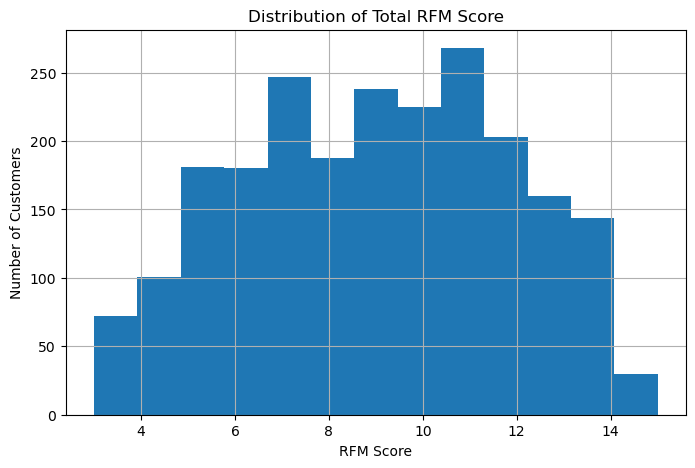

In [106]:
#Distribution of Total RFM Score
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
df['RFM_Score'].hist(bins=13)
plt.title('Distribution of Total RFM Score')
plt.xlabel('RFM Score')
plt.ylabel('Number of Customers')
plt.show()

#This chart shows how many customers fall into each overall RFM score. You can quickly see how many ‘top’ (score 13-15) vs. ‘low’ (score 3-5) value customers you have.

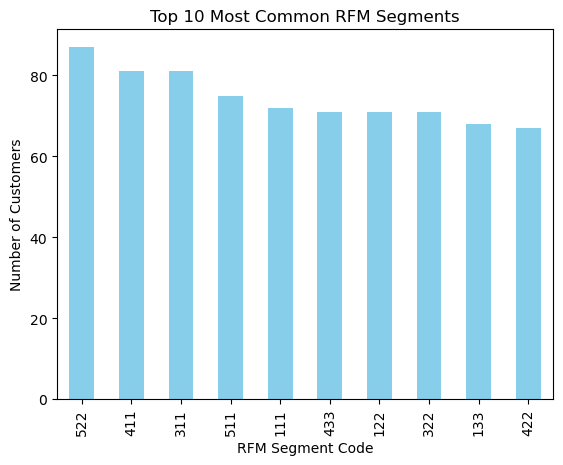

In [107]:
#Top 10 RFM Segment Codes
top_segments = df['RFM_Segment'].value_counts().head(10)
top_segments.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Common RFM Segments')
plt.xlabel('RFM Segment Code')
plt.ylabel('Number of Customers')
plt.show()

#Most customers fall into a handful of RFM segment patterns, which helps target the largest groups first.


Define and Profile Key Segments

- Champions: RFM score sum 13-15 (555, 554, 545, etc.) |
- Loyal Customers: Score 10-12 |
- Potential Loyalist: Score 9-10 |
- At Risk: Low Recency score, medium/high F & M

In [108]:
# Champions: highest scores (can adjust cutoffs)
champions = df[df['RFM_Score'] >= 13]
print("Champions:\n", champions.describe())

Champions:
                  ID   Year_Birth         Income     Kidhome    Teenhome  \
count    334.000000   334.000000     334.000000  334.000000  334.000000   
mean    5769.526946  1967.877246   72902.083832    0.080838    0.398204   
min       25.000000  1943.000000    2447.000000    0.000000    0.000000   
25%     3440.500000  1958.000000   64500.000000    0.000000    0.000000   
50%     5534.000000  1969.000000   72419.500000    0.000000    0.000000   
75%     8572.000000  1978.000000   80719.500000    0.000000    1.000000   
max    11112.000000  1995.000000  160803.000000    1.000000    2.000000   
std     3118.758228    12.881298   14346.543815    0.272996    0.514180   

                         Dt_Customer     Recency     MntWines   MntFruits  \
count                            334  334.000000   334.000000  334.000000   
mean   2013-06-03 09:42:02.155688704   21.742515   669.874251   57.931138   
min              2012-07-31 00:00:00    0.000000     1.000000    0.000000   
25% 

In [109]:
# At Risk: lowest Recency, but non-zero Frequency and Monetary
at_risk = df[(df['R_Score'] <= 2) & (df['F_Score'] >= 3) & (df['M_Score'] >= 3)]
print("At Risk:\n", at_risk.describe())

At Risk:
                  ID   Year_Birth         Income     Kidhome    Teenhome  \
count    538.000000   538.000000     538.000000  538.000000  538.000000   
mean    5391.959108  1966.927509   64085.654275    0.200743    0.535316   
min        0.000000  1941.000000    7144.000000    0.000000    0.000000   
25%     2836.500000  1957.000000   52648.000000    0.000000    0.000000   
50%     5319.000000  1967.000000   64874.500000    0.000000    0.000000   
75%     8008.000000  1975.000000   75702.000000    0.000000    1.000000   
max    11171.000000  1993.000000  157243.000000    2.000000    2.000000   
std     3203.607655    11.715130   15817.739739    0.432221    0.568950   

                         Dt_Customer     Recency     MntWines   MntFruits  \
count                            538  538.000000   538.000000  538.000000   
mean   2013-06-02 21:00:40.148698880   79.044610   500.345725   39.511152   
min              2012-07-30 00:00:00   60.000000     7.000000    0.000000   
25%   

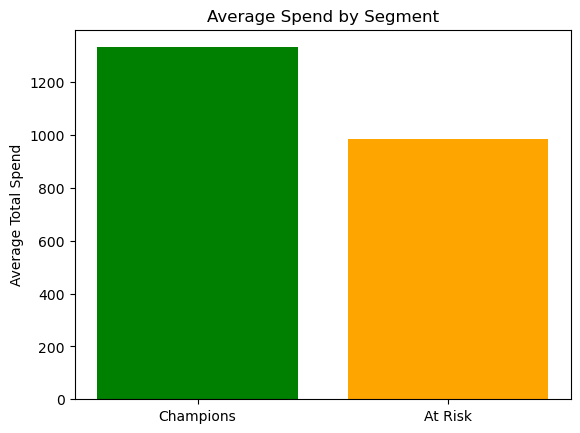

In [110]:
# Compare average spend of Champions vs At Risk
segment_labels = []
avg_spend = []

# Add more if you define more segments!
segment_labels.append('Champions')
avg_spend.append(champions['Monetary'].mean())

segment_labels.append('At Risk')
avg_spend.append(at_risk['Monetary'].mean())

plt.bar(segment_labels, avg_spend, color=['green', 'orange'])
plt.title('Average Spend by Segment')
plt.ylabel('Average Total Spend')
plt.show()

#Customers in the 'Champions' segment—those with the highest recency, frequency, and monetary value—spend on average $X, compared to 'At Risk' customers who average only $Y. This highlights clear opportunities for loyalty programs, targeted offers, and re-engagement campaigns.


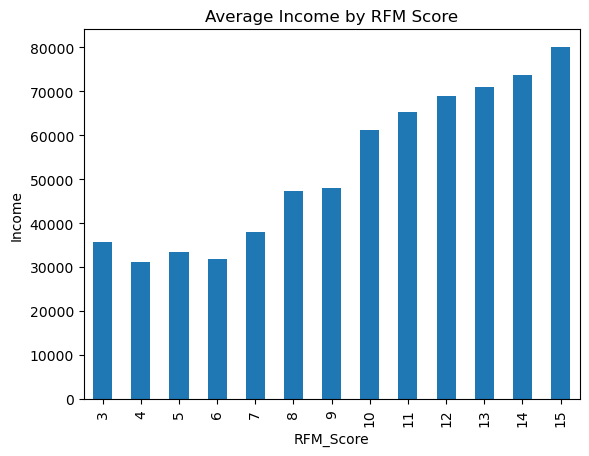

In [111]:
#You can compare age, income, product interest, or region by segment:

df.groupby('RFM_Score')['Income'].mean().plot(kind='bar')
plt.title('Average Income by RFM Score')
plt.ylabel('Income')
plt.show()


Define Multiple RFM Segments

- Champions: RFM score sum 13–15
- Loyal Customers: 11–12
- Potential Loyalists: 9–10
- At Risk: Low R, but higher F & M
- Hibernating: Low on all three
- New Customers: High R (just joined), low F & M
- Promising: Medium everywhere

In [128]:
def rfm_segment(row):
    if row['RFM_Score'] >= 13:
        return 'Champions'
    elif row['RFM_Score'] >= 11:
        return 'Loyal Customers'
    elif row['RFM_Score'] >= 9:
        return 'Potential Loyalists'
    elif row['R_Score'] <= 2 and row['F_Score'] >= 3 and row['M_Score'] >= 3:
        return 'At Risk'
    elif row['R_Score'] == 5 and row['F_Score'] == 1 and row['M_Score'] == 1:
        return 'New Customers'
    elif row['RFM_Score'] <= 6:
        return 'Hibernating'
    else:
        return 'Promising'

df['Segment'] = df.apply(rfm_segment, axis=1)
df['Segment'].value_counts()

Segment
Hibernating            534
Loyal Customers        471
Potential Loyalists    463
Champions              334
Promising              199
At Risk                161
New Customers           75
Name: count, dtype: int64

In [132]:
print(df['Segment'].value_counts().reset_index().rename(columns={'index': 'Segment', 'Segment': 'Count'}).to_markdown(index=False))

| Count               |   count |
|:--------------------|--------:|
| Hibernating         |     534 |
| Loyal Customers     |     471 |
| Potential Loyalists |     463 |
| Champions           |     334 |
| Promising           |     199 |
| At Risk             |     161 |
| New Customers       |      75 |


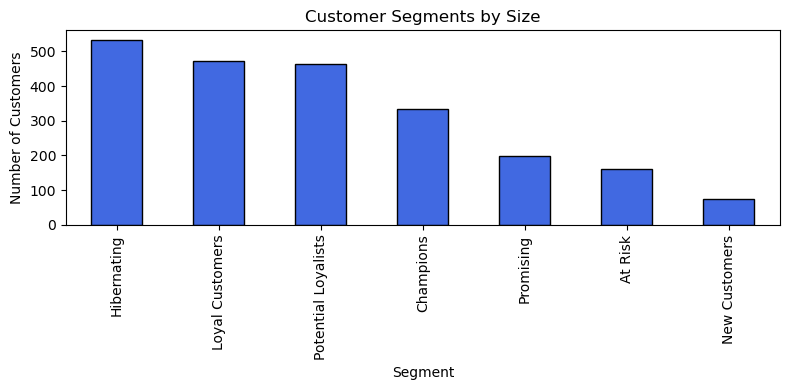

In [126]:
plt.figure(figsize=(8,4))
df['Segment'].value_counts().plot(kind='bar', color='royalblue', edgecolor='black')
plt.title('Customer Segments by Size')
plt.xlabel('Segment')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.savefig('rfm_segment_counts.png')
plt.show()

Profile Segments

Analyse:
- Demographics: Age, Income, Family (Kidhome, Teenhome), Education, Marital_Status, Country
- Product Interests: Average spend by category (MntWines, MntFruits, etc.)
- Channel Usage: Which group prefers web/catalog/store?
- Campaign Response: Which segments accept more campaigns?


In [113]:
# Average age, income, kids/teens by segment
df.groupby('Segment')[['Age', 'Income', 'Kidhome', 'Teenhome']].mean()

,Age,Income,Kidhome,Teenhome
Segment,,,,
At Risk,57.801242,50532.875776,0.459627,0.677019
Champions,57.122754,72902.083832,0.080838,0.398204
Hibernating,53.391386,32821.758427,0.831461,0.455056
Loyal Customers,58.509554,66916.709130,0.146497,0.535032
New Customers,53.066667,30853.333333,0.773333,0.426667
Potential Loyalists,56.857451,54368.438445,0.347732,0.576674
Promising,53.934673,39277.597990,0.809045,0.487437


In [114]:
# Product preferences by segment
df.groupby('Segment')[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].mean()

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
Segment,,,,,,
At Risk,215.279503,17.018634,97.683230,24.788820,18.254658,47.751553
Champions,669.874251,57.931138,385.595808,83.589820,60.149701,75.467066
Hibernating,21.191011,3.352060,13.640449,4.814607,3.531835,10.554307
Loyal Customers,546.575372,45.946921,301.513800,64.874735,45.749469,66.747346
New Customers,10.946667,1.960000,7.106667,2.293333,2.360000,4.986667
Potential Loyalists,311.062635,25.939525,160.902808,37.373650,27.848812,53.647948
Promising,40.422111,5.477387,22.859296,7.165829,5.120603,15.964824


In [115]:
# Channel use by segment
df.groupby('Segment')[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].mean()

,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
Segment,,,
At Risk,4.801242,1.863354,5.559006
Champions,6.401198,5.766467,9.098802
Hibernating,1.548689,0.357678,2.822097
Loyal Customers,5.700637,4.588110,8.218684
New Customers,1.026667,0.053333,2.586667
Potential Loyalists,4.678186,2.749460,6.038877
Promising,2.396985,0.507538,3.316583


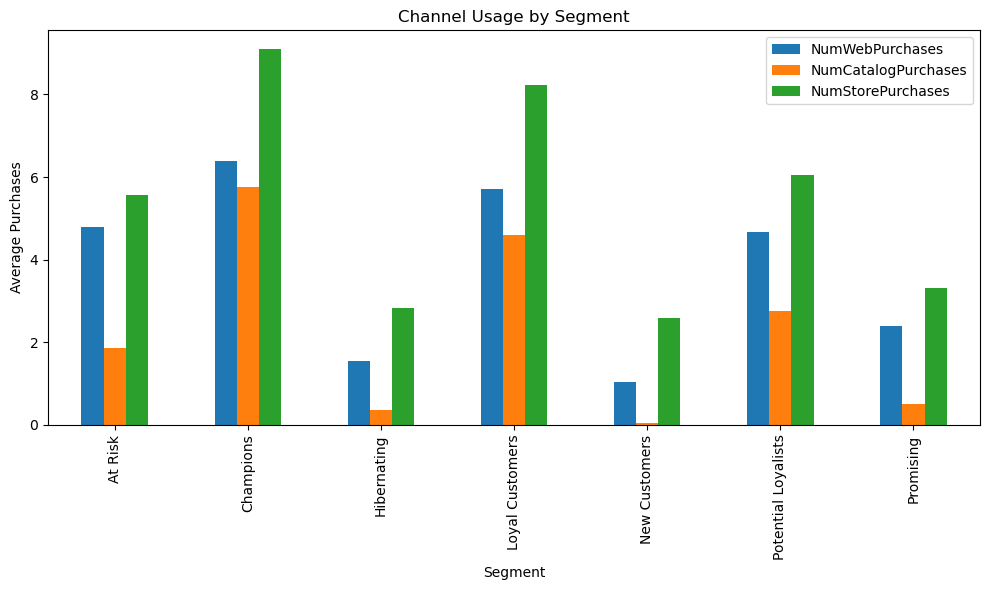

In [136]:
channel_cols = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
df.groupby('Segment')[channel_cols].mean().plot(kind='bar', figsize=(10,6))
plt.title('Channel Usage by Segment')
plt.ylabel('Average Purchases')
plt.tight_layout()
plt.savefig('channel_usage_by_segment.png')
plt.show()

In [116]:

# Campaign response by segment
campaign_cols = ['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response']
df.groupby('Segment')[campaign_cols].mean()

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response
Segment,,,,,,
At Risk,0.031056,0.006211,0.068323,0.080745,0.006211,0.055901
Champions,0.188623,0.029940,0.092814,0.134731,0.215569,0.332335
Hibernating,0.000000,0.003745,0.065543,0.007491,0.000000,0.039326
Loyal Customers,0.116773,0.027601,0.074310,0.140127,0.135881,0.203822
New Customers,0.000000,0.000000,0.066667,0.000000,0.000000,0.093333
Potential Loyalists,0.045356,0.008639,0.066955,0.077754,0.053996,0.140389
Promising,0.000000,0.000000,0.075377,0.015075,0.000000,0.125628


In [137]:
campaign_cols = ['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response']
print(df.groupby('Segment')[campaign_cols].mean().round(2).to_markdown())

| Segment             |   AcceptedCmp1 |   AcceptedCmp2 |   AcceptedCmp3 |   AcceptedCmp4 |   AcceptedCmp5 |   Response |
|:--------------------|---------------:|---------------:|---------------:|---------------:|---------------:|-----------:|
| At Risk             |           0.03 |           0.01 |           0.07 |           0.08 |           0.01 |       0.06 |
| Champions           |           0.19 |           0.03 |           0.09 |           0.13 |           0.22 |       0.33 |
| Hibernating         |           0    |           0    |           0.07 |           0.01 |           0    |       0.04 |
| Loyal Customers     |           0.12 |           0.03 |           0.07 |           0.14 |           0.14 |       0.2  |
| New Customers       |           0    |           0    |           0.07 |           0    |           0    |       0.09 |
| Potential Loyalists |           0.05 |           0.01 |           0.07 |           0.08 |           0.05 |       0.14 |
| Promising           | 

Visualise each product by segment


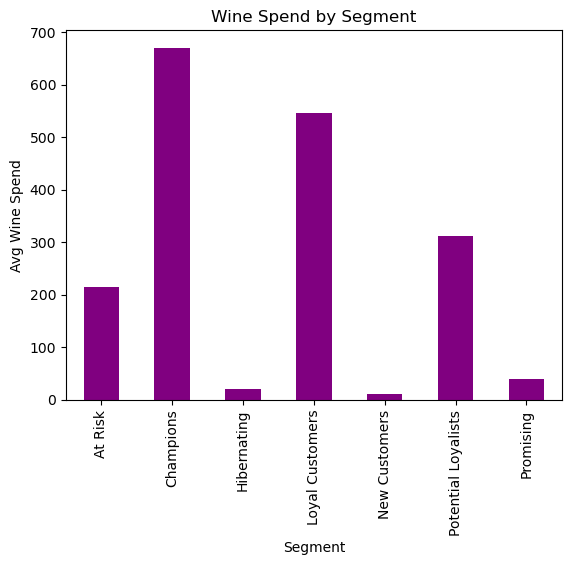

In [117]:
import matplotlib.pyplot as plt

# Avg spend on wine per segment
df.groupby('Segment')['MntWines'].mean().plot(kind='bar', color='purple')
plt.ylabel('Avg Wine Spend')
plt.title('Wine Spend by Segment')
plt.show()



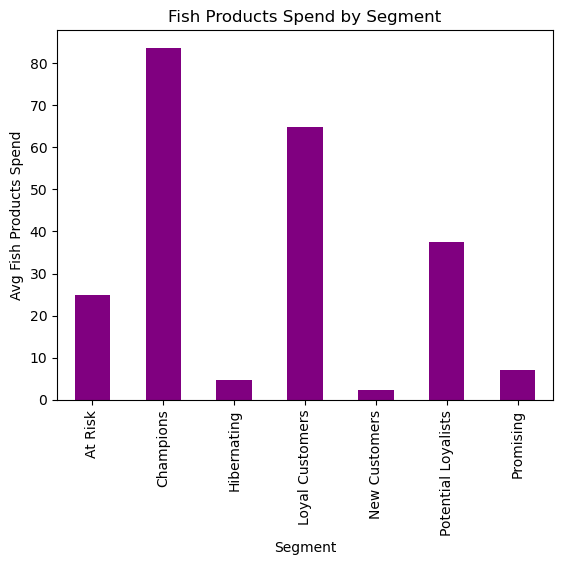

In [118]:
# Avg spend on wine per segment
df.groupby('Segment')['MntFishProducts'].mean().plot(kind='bar', color='purple')
plt.ylabel('Avg Fish Products Spend')
plt.title('Fish Products Spend by Segment')
plt.show()

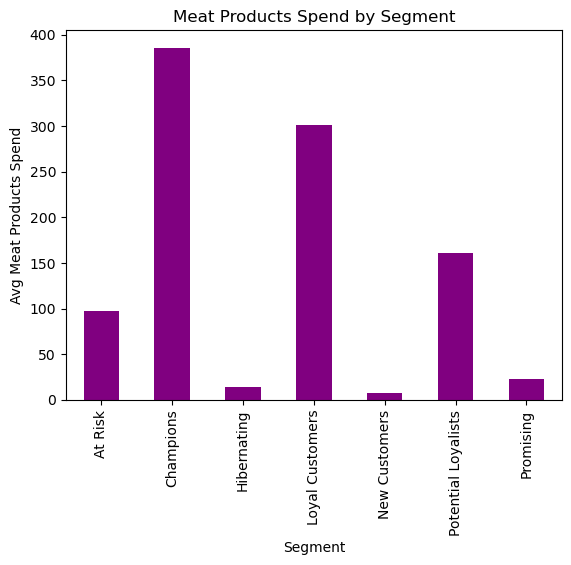

In [119]:
df.groupby('Segment')['MntMeatProducts'].mean().plot(kind='bar', color='purple')
plt.ylabel('Avg Meat Products Spend')
plt.title('Meat Products Spend by Segment')
plt.show()

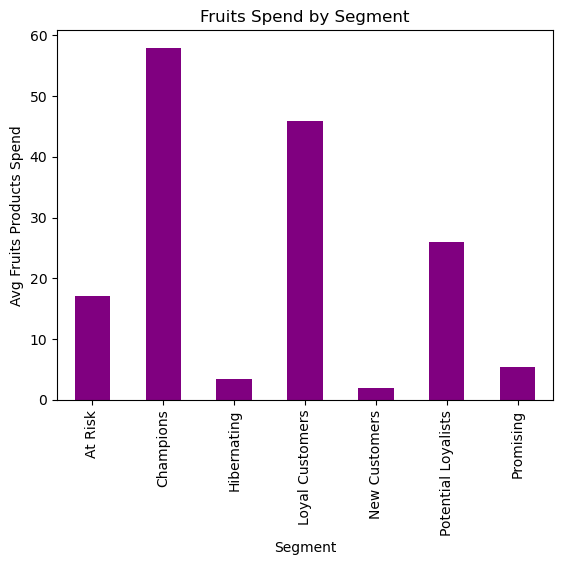

In [120]:
df.groupby('Segment')['MntFruits'].mean().plot(kind='bar', color='purple')
plt.ylabel('Avg Fruits Products Spend')
plt.title('Fruits Spend by Segment')
plt.show()

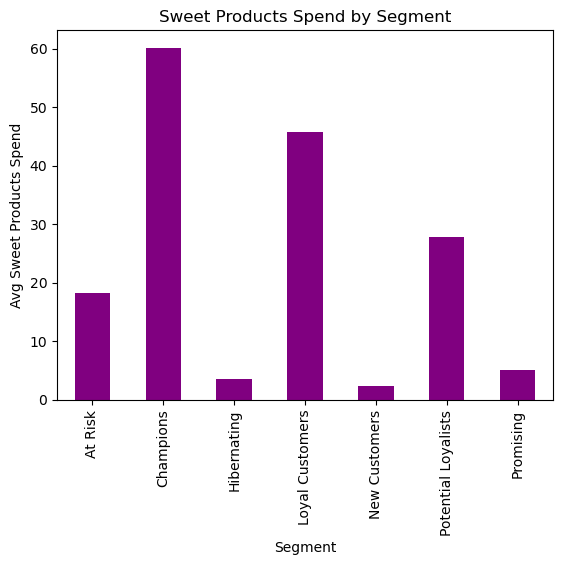

In [121]:
df.groupby('Segment')['MntSweetProducts'].mean().plot(kind='bar', color='purple')
plt.ylabel('Avg Sweet Products Spend')
plt.title('Sweet Products Spend by Segment')
plt.show()

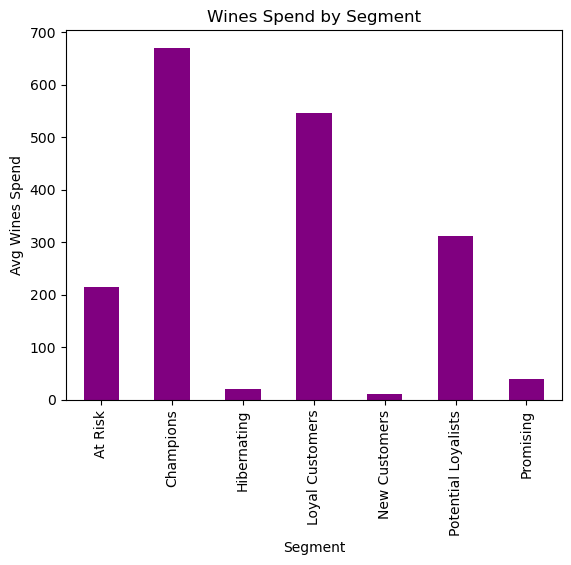

In [122]:
df.groupby('Segment')['MntWines'].mean().plot(kind='bar', color='purple')
plt.ylabel('Avg Wines Spend')
plt.title('Wines Spend by Segment')
plt.show()

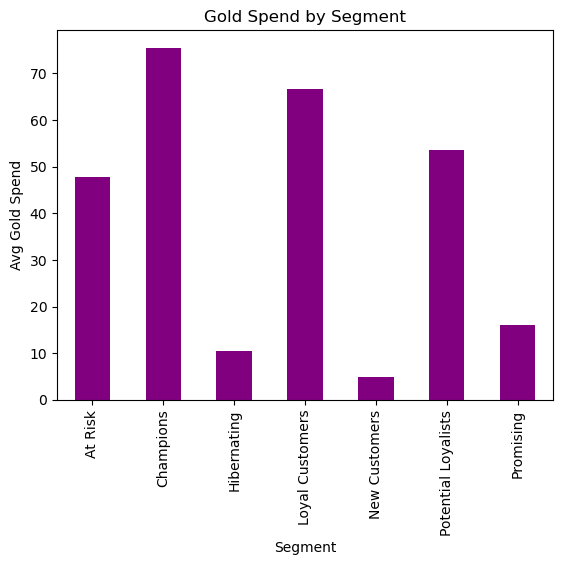

In [123]:
df.groupby('Segment')['MntGoldProds'].mean().plot(kind='bar', color='purple')
plt.ylabel('Avg Gold Spend')
plt.title('Gold Spend by Segment')
plt.show()

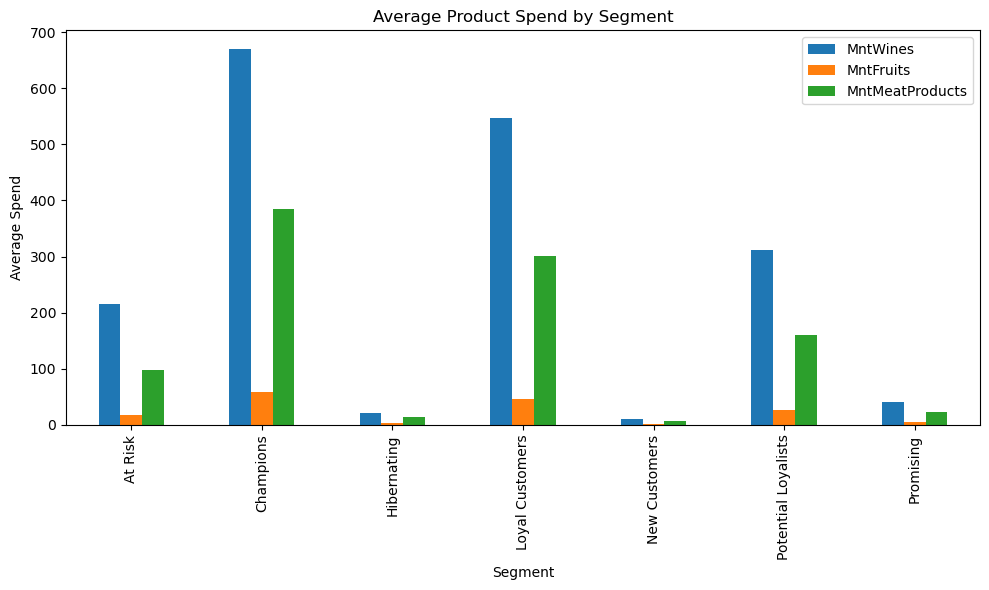

In [134]:
product_cols = ['MntWines', 'MntFruits', 'MntMeatProducts']
df.groupby('Segment')[product_cols].mean().plot(kind='bar', figsize=(10,6))
plt.title('Average Product Spend by Segment')
plt.ylabel('Average Spend')
plt.tight_layout()
plt.savefig('product_spend_by_segment.png')
plt.show()

In [124]:
df.to_csv('marketing_campaign_final_v2.csv', index=False)
